<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLatFIAN2021/blob/main/seminar10/MLatFIAN_2021_seminar10_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.7.0


# Classifying clothes

[['Pullover' 'Trouser' 'Bag' 'Coat' 'Trouser']
 ['Ankle boot' 'Pullover' 'Pullover' 'T-shirt/top' 'Pullover']
 ['Shirt' 'Ankle boot' 'T-shirt/top' 'Sneaker' 'Sandal']
 ['Coat' 'T-shirt/top' 'Trouser' 'Bag' 'T-shirt/top']
 ['Coat' 'Pullover' 'Shirt' 'Sneaker' 'T-shirt/top']]


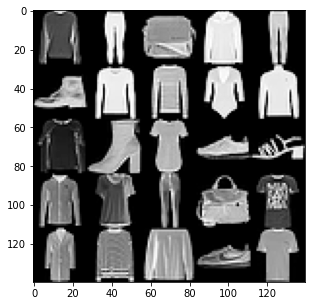

In [2]:
import tensorflow_datasets as tfds

data_train = tfds.load(name="fashion_mnist", split="train").prefetch(60000).cache()
data_test  = tfds.load(name="fashion_mnist", split="test" ).prefetch(10000).cache()

# Array for decoding the categories
label_names = np.array(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle boot'])

# Get a single data batch of 25 images
sample_data = next(iter(data_train.batch(25)))
sample_images = sample_data['image']
sample_labels = sample_data['label']

# Plot the images in a 5x5 grid
plt.figure(figsize=(5, 5))
plt.imshow(
    sample_images.numpy().reshape(5, 5, 28, 28).transpose((0, 2, 1, 3)).reshape(140, 140),
    cmap='gray'
)
# Print corresponding labels
print(label_names[sample_labels.numpy().reshape(5, 5)])

**Task**:

Train a model which is an average of two models with different numbers of layers on the Fashion MNIST dataset, e.g.:

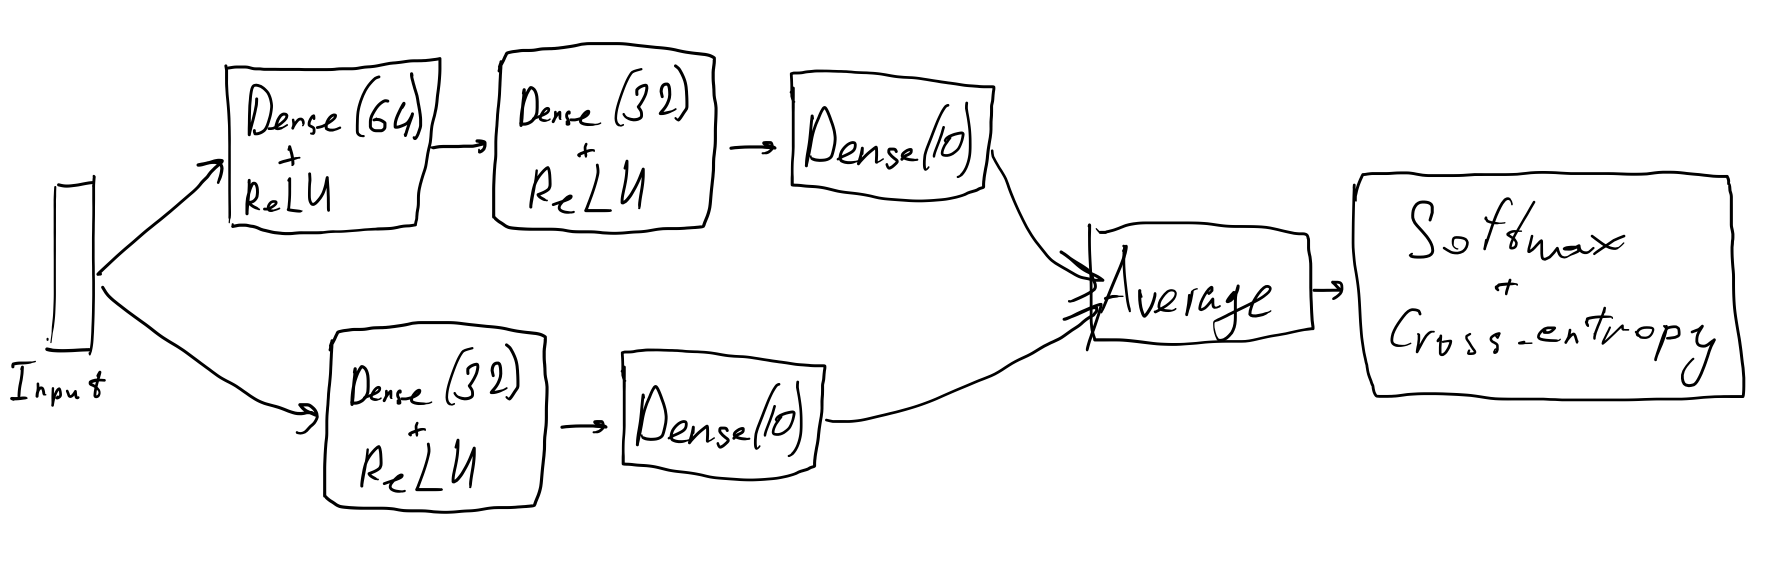

You can:
 - either use low-level API for that (still using `tf.keras.Sequential` models as building blocks)
 - or use `tf.keras.Model` for an arbitrary model (see examples from https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [21]:
top_branch = tf.keras.Sequential([
    
    tf.keras.layers.Lambda(
      lambda x: tf.reshape(x / 255., (-1, 28*28)),
      input_shape=(28, 28, 1), name='preprocessing'
  ),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10)
])

down_branch = tf.keras.Sequential([
    
    tf.keras.layers.Lambda(
      lambda x: tf.reshape(x / 255., (-1, 28*28)),
      input_shape=(28, 28, 1), name='preprocessing'
  ),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10)
])


inputs = tf.keras.Input(shape=(28, 28, 1))
average = tf.keras.layers.Average()([top_branch(inputs),down_branch(inputs)])
outputs = tf.keras.layers.Dense(10, activation='softmax', name='softmax')(average)
model = tf.keras.Model(inputs, outputs)


In [22]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 sequential_22 (Sequential)     (None, 10)           52650       ['input_9[0][0]']                
                                                                                                  
 sequential_23 (Sequential)     (None, 10)           25450       ['input_9[0][0]']                
                                                                                                  
 average_6 (Average)            (None, 10)           0           ['sequential_22[0][0]',          
                                                                  'sequential_23[0][0]']    

In [23]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = 'accuracy')

In [24]:
def unwrap(x):
  return (x['image'], x['label'])

batch_size = 1024
model.fit(x=data_train.map(unwrap).shuffle(60000).batch(batch_size),
          epochs=10,
          validation_data=data_test.map(unwrap).batch(4096))

Epoch 1/10
59/59 [==============================] - 1s 8ms/step - loss: 1.0912 - accuracy: 0.6382 - val_loss: 0.6836 - val_accuracy: 0.7662
Epoch 2/10
59/59 [==============================] - 0s 6ms/step - loss: 0.5845 - accuracy: 0.8021 - val_loss: 0.5562 - val_accuracy: 0.8064
Epoch 3/10
59/59 [==============================] - 0s 7ms/step - loss: 0.5018 - accuracy: 0.8281 - val_loss: 0.5066 - val_accuracy: 0.8249
Epoch 4/10
59/59 [==============================] - 0s 6ms/step - loss: 0.4572 - accuracy: 0.8438 - val_loss: 0.4819 - val_accuracy: 0.8350
Epoch 5/10
59/59 [==============================] - 0s 7ms/step - loss: 0.4282 - accuracy: 0.8522 - val_loss: 0.4561 - val_accuracy: 0.8448
Epoch 6/10
59/59 [==============================] - 0s 7ms/step - loss: 0.4116 - accuracy: 0.8577 - val_loss: 0.4445 - val_accuracy: 0.8475
Epoch 7/10
59/59 [==============================] - 0s 7ms/step - loss: 0.3945 - accuracy: 0.8633 - val_loss: 0.4328 - val_accuracy: 0.8521
Epoch 8/10
59/59 [==

Кажется, всё получилось! Точность 0.8553